# Predicting the Sale Price of Bulldozers using Machine Learning

work on an example machine learning project with the goal of predicting the sale price of Bulldozers.

## 1. Problem Definition

How well can we predict the future price of Bulldozers, given the characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle : https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 datasets.
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

The goal for this project is to build the machine learning model which minimises the RMSLE.

## 4. Features

Provided with a data dictionary which contains the deails of all the features of the dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import the training and validation dataset

df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

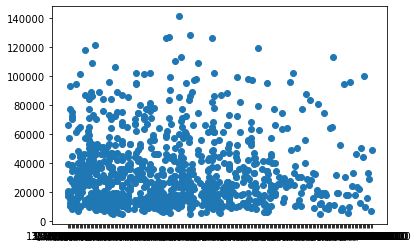

In [5]:
fig, ax= plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

<AxesSubplot:ylabel='Frequency'>

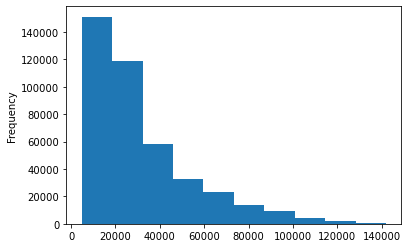

In [6]:
df['SalePrice'].plot(kind = 'hist')

### Parsing dates

In [7]:

# We can enrich the time & date component using 'parse_dates' parameters
df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False, parse_dates=['saledate'])
df['saledate']

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

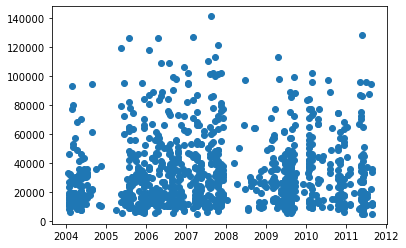

In [8]:
fig, ax= plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [9]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [10]:
df['saledate'].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DateFrame by saledate (Especially for Time Series Data )

In [11]:
df.sort_values(by=['saledate'], inplace = True, ascending=True)
df['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
# make a copy
df_tmp = df.copy()

### Create datetime parameters for 'saledate'

In [13]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDate'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [14]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDate,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [15]:
df_tmp.drop('saledate', axis =1, inplace =True)

In [16]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDate,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [17]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Convert Data to numbers

Since machine learning model can't learn from string

In [18]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

### Convert string to categories

We wil have a way to access all the data in the form of numbers because of pandas Categories.

In [19]:
# find the columns which contain strings
string = []
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        string.append(label)
print(string)
    

['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']


In [20]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype('category').cat.as_ordered()

In [21]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [22]:
df_tmp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [23]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [25]:
df_tmp.to_csv('bluebook-for-bulldozers/train_tmp.csv',index=False)

In [26]:
df_tmp = pd.read_csv('bluebook-for-bulldozers/train_tmp.csv', low_memory=False)

In [31]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDate,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


## Filling missing data

### Fill numerical values

In [32]:
for name, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(name)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDate
saleDayOfWeek
saleDayOfYear


In [33]:
for name, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(name)

auctioneerID
MachineHoursCurrentMeter


In [34]:
# fill numerical values with the median
for name, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[name+'is_missing'] = pd.isnull(content)
            df_tmp[name] = content.fillna(content.median())

In [35]:
for name, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(name)
        else:
            print(None)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


### Filling and turning categorical variables into numbers

In [36]:
df_tmp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

In [37]:
# check for columns which are not numeric
for name, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(name)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [38]:
pd.Categorical(df_tmp['state'])

['Texas', 'Florida', 'Florida', 'Florida', 'Florida', ..., 'California', 'California', 'California', 'California', 'California']
Length: 412698
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [39]:
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [40]:
pd.Categorical(df_tmp['UsageBand']).codes
# don't want the numbers to be -1, so +1 when convert the data to numbers

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [41]:
# turn categorical variables into numbers and fill missing
for name, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[name +'is_missing'] =  pd.isnull(content)
        df_tmp[name] = pd.Categorical(content).codes+1

In [42]:
pd.Categorical(df_tmp['UsageBand'])

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 412698
Categories (4, int64): [0, 1, 2, 3]

In [43]:
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

In [44]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


## 5. Modelling

In [45]:
# split data into training and validation sets
df_val = df_tmp[df_tmp.saleYear ==2012]
df_train = df_tmp[df_tmp.saleYear !=2012]

len(df_train), len(df_val)

(401125, 11573)

In [46]:
# split date into X,y
X_train,y_train= df_train.drop('SalePrice', axis = 1), df_train['SalePrice']
X_valid,y_valid= df_val.drop('SalePrice', axis = 1), df_val['SalePrice']
X_train.shape,y_train.shape, X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [47]:
## this will take far too long
#%%time
from sklearn.ensemble import RandomForestRegressor
#reg = RandomForestRegressor(n_jobs=-1, random_state=42)
#reg.fit(X_train, y_train)

In [48]:
len(X_train)

401125

In [49]:
# change max_samples value
%time
reg = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=100000)
reg.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.3 µs


RandomForestRegressor(max_samples=100000, n_jobs=-1, random_state=42)

## Evaluation function

In [50]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculate root mean squared log error between the true labels and predictions.
    """
    return np.sqrt(mean_squared_log_error( y_test,y_preds))

def model_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'MAE(Training)': mean_absolute_error(y_train, train_preds),
              'MAE(Valid)': mean_absolute_error(y_valid, val_preds),
              'RMSLE(Training)': rmsle(y_train, train_preds),
              'RMSLE(Valid)': rmsle(y_valid, val_preds),
              'R^2(Training)': r2_score(y_train, train_preds),
              'R^2(Valid)':r2_score(y_valid, val_preds)}
    return scores

In [51]:
model_scores(reg)

{'MAE(Training)': 3588.5677039077596,
 'MAE(Valid)': 6193.733662835912,
 'RMSLE(Training)': 0.17533085989490504,
 'RMSLE(Valid)': 0.25674596551158657,
 'R^2(Training)': 0.9389791835237717,
 'R^2(Valid)': 0.8710523572862298}

### Hyperparameter tuning with RandomizedSearchCV

In [52]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'n_estimators': np.arange(10,100,10),
           'max_depth': [None, 3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1, random_state = 42),
                              param_distributions=rf_grid,
                             n_iter = 2,
                             cv=5,
                             verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished


CPU times: user 46.3 s, sys: 6.8 s, total: 53.1 s
Wall time: 1min 42s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [53]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 12,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [54]:
model_scores(rs_model)

{'MAE(Training)': 6201.6221504978585,
 'MAE(Valid)': 7777.819127058065,
 'RMSLE(Training)': 0.28055440110269314,
 'RMSLE(Valid)': 0.31064102989592973,
 'R^2(Training)': 0.824974696772343,
 'R^2(Valid)': 0.794600699414547}

In [55]:
model_scores(reg)

{'MAE(Training)': 3588.5677039077596,
 'MAE(Valid)': 6193.733662835912,
 'RMSLE(Training)': 0.17533085989490504,
 'RMSLE(Valid)': 0.25674596551158657,
 'R^2(Training)': 0.9389791835237717,
 'R^2(Valid)': 0.8710523572862298}

In [56]:
%%time
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features = 0.5,
                                    n_jobs = -1,
                                    max_samples=None,
                                    random_state=42)
ideal_model.fit(X_train,y_train)

CPU times: user 5min 2s, sys: 1.87 s, total: 5min 4s
Wall time: 1min 23s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [57]:
# scores for the ideal model (trained on all the data)
model_scores(ideal_model)

{'MAE(Training)': 2953.8161137163484,
 'MAE(Valid)': 5951.247761444453,
 'RMSLE(Training)': 0.14469006962371858,
 'RMSLE(Valid)': 0.24524163989538328,
 'R^2(Training)': 0.9588145522577225,
 'R^2(Valid)': 0.8818019502450094}

In [58]:
# scores for the original model (max samples = 100000)
model_scores(reg)

{'MAE(Training)': 3588.5677039077596,
 'MAE(Valid)': 6193.733662835912,
 'RMSLE(Training)': 0.17533085989490504,
 'RMSLE(Valid)': 0.25674596551158657,
 'R^2(Training)': 0.9389791835237717,
 'R^2(Valid)': 0.8710523572862298}

## Make predictions on test data

In [59]:
df_test = pd.read_csv('bluebook-for-bulldozers/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688,28555,6038,8940,2286
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

### Preprocessing test data (the same format as the training dataset)

In [61]:
def preprocess_data(df):
    df.sort_values(by=['saledate'], inplace = True, ascending=True)
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDate'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    df.drop('saledate', axis =1, inplace =True)
    
    #fill the numeric rows with median
    for name, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[name+'is_missing'] = pd.isnull(content)
                df[name] = content.fillna(content.median())
    
    #convert object to category
    
    for name, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[name]=content.astype('category').cat.as_ordered()
    
    #fill the categorical missing data and turn categorical into numbers
    for name, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[name +'is_missing'] =  pd.isnull(content)
            df[name] = pd.Categorical(content).codes+1
    
    return df

In [62]:
df_test = preprocess_data(df_test)
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,6620191,2272921,9518,172,1,2005,3525.0,0,423,154,...,True,True,True,True,True,True,True,True,True,True
9936,6620142,2297127,9579,172,1,2008,3525.0,0,1675,676,...,True,True,True,True,True,True,True,True,True,True
11620,6635116,1412453,2160,149,1,2002,3525.0,0,1722,702,...,False,False,False,False,False,True,True,True,True,True
9995,6621460,2554811,13316,149,1,2003,3525.0,0,936,341,...,False,False,False,False,False,True,True,True,True,True


In [63]:
df_test.isna().sum()

SalesID                        0
MachineID                      0
ModelID                        0
datasource                     0
auctioneerID                   0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 101, dtype: int64

In [64]:
# find the different in columns between X_train.columns and df_test.columns
set(X_train.columns) - set(df_test.columns)

{'auctioneerIDis_missing'}

In [65]:
# adjust the df_test to have 'auctioneerIDis_missing'
df_test['auctioneerIDis_missing'] = False

In [66]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerIDis_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,False
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,False
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,False
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,False,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,True,True,True,True,True,False


In [67]:
test_preds = ideal_model.predict(df_test)
len(test_preds)

12457

In [68]:
#Format the prediction into a DataFrame
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds

In [69]:
df_preds

,SalesID,SalePrice
1408,4317459,15714.812841
1023,4249784,18097.596463
1728,4392603,24327.538681
1167,4274831,25844.868510
1594,4362801,22844.681888
...,...,...
9941,6620191,19134.803380
9936,6620142,23474.504469
11620,6635116,44400.221637
9995,6621460,43881.422362


In [70]:
# Export the data to csv

df_preds.to_csv('bluebook-for-bulldozers/test_predictions.csv', index=False)

## Feature Importance

Which attributes of the data were the most important when it comes to predict the target(SalePrice)?

In [71]:
# find the feature importance
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [72]:
def features_plot(columns, importances, n=20):
    df = (pd.DataFrame({'features':columns,
                        'feature_importances':importances})
          .sort_values('feature_importances', ascending = False)
          .reset_index(drop = True))
          
    # plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:n] )
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importances')
    ax.invert_yaxis()

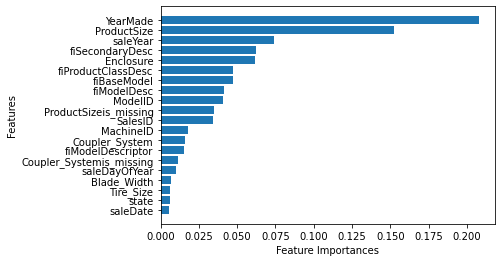

In [73]:
features_plot(X_train.columns, ideal_model.feature_importances_)